In [12]:
#import the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
import seaborn as sns
warnings.filterwarnings("ignore", category=FutureWarning)



In [13]:
# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Use only the first two features (sepal length and sepal width)
y = iris.target

# Create a DataFrame for better visualization and data analysis
iris_df = pd.DataFrame(data=np.c_[X, y], columns=["Sepal Length in cm", "Sepal Width in cm", "Species"])


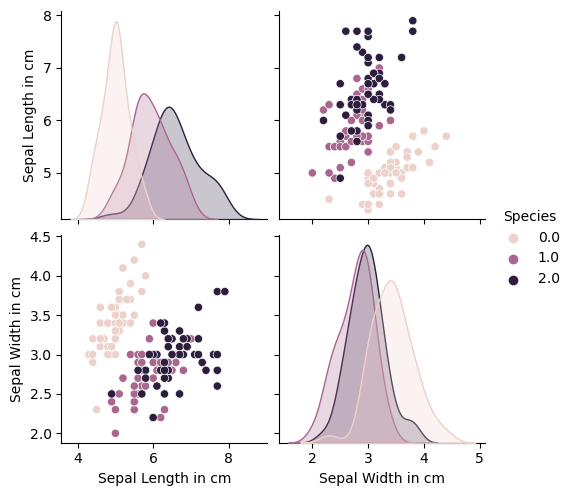

In [14]:
# Create a pair plot to visualize pairwise relationships in the Iris dataset

sns.pairplot(iris_df, hue='Species', height=2.5)
plt.show()


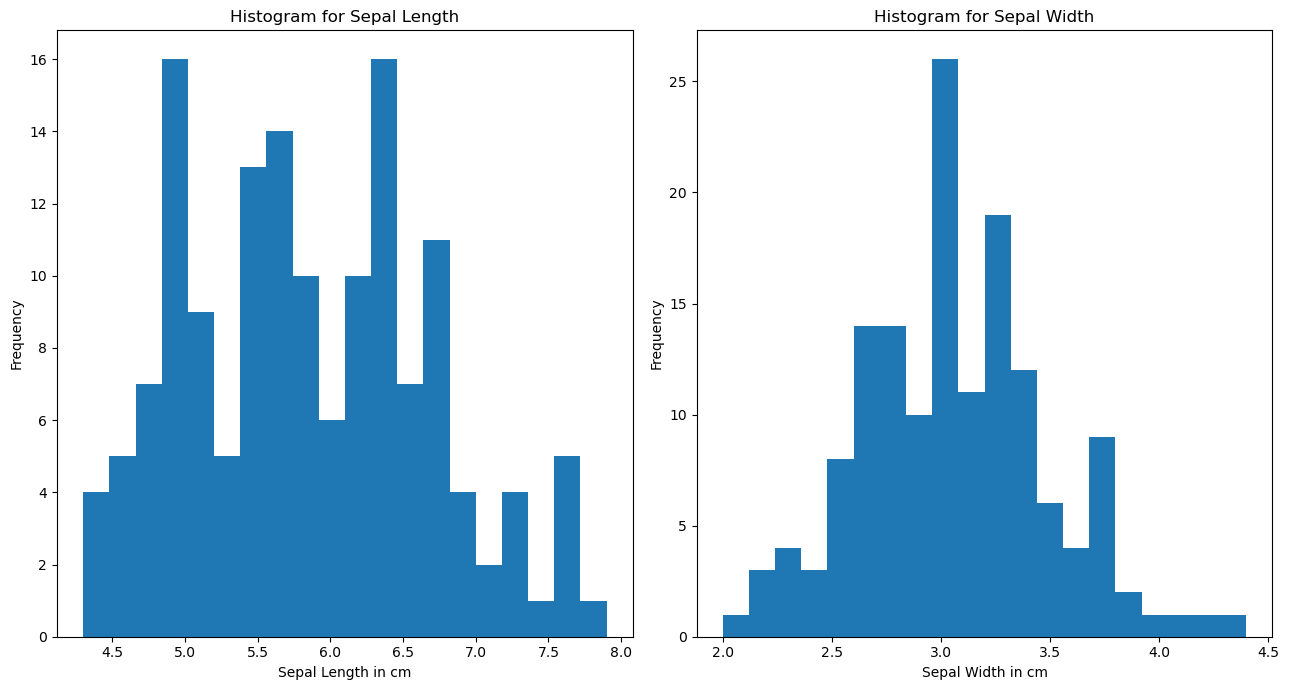

In [15]:
# Create histograms for sepal length and sepal width
plt.figure(figsize=(13, 7))

# Histogram for Sepal Length
plt.subplot(1, 2, 1)
plt.hist(X[:, 0], bins=20)
plt.xlabel("Sepal Length in cm")
plt.ylabel("Frequency")
plt.title("Histogram for Sepal Length")

# Histogram for Sepal Width
plt.subplot(1, 2, 2)
plt.hist(X[:, 1], bins=20)
plt.xlabel("Sepal Width in cm")
plt.ylabel("Frequency")
plt.title("Histogram for Sepal Width")

plt.tight_layout()
plt.show()


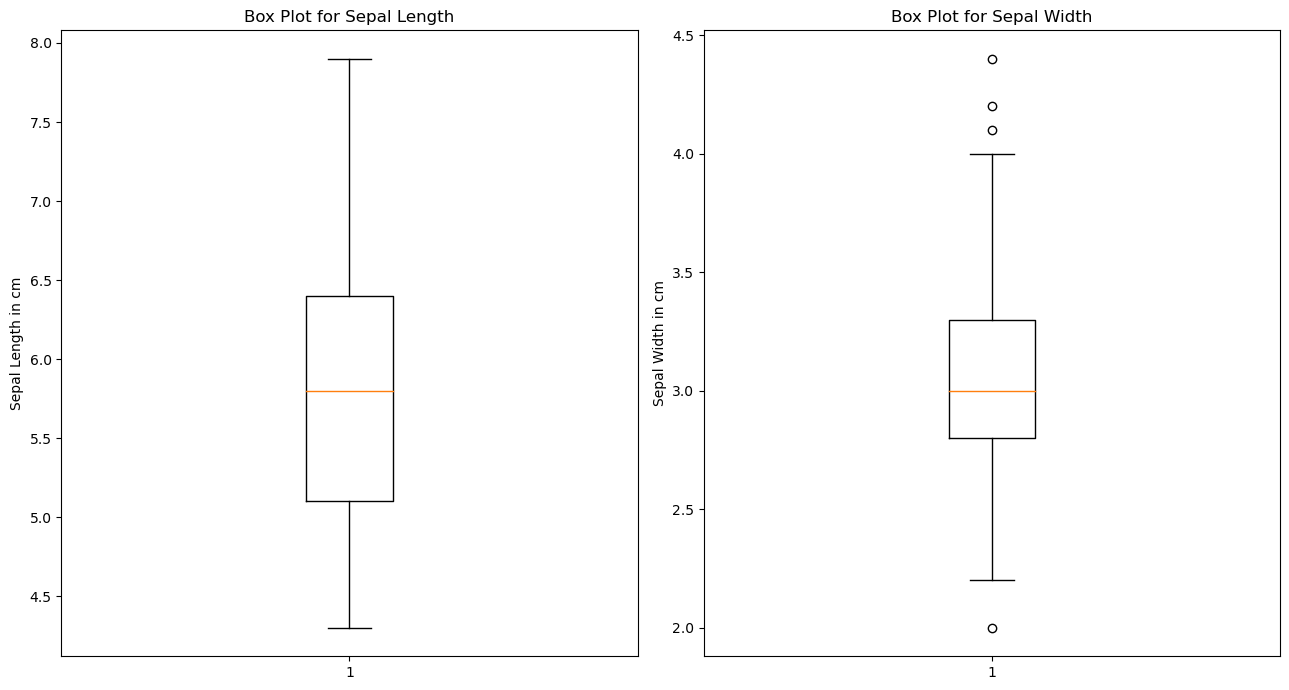

In [16]:
# Create box plots for sepal length and sepal width
plt.figure(figsize=(13, 7))

# Box plot for Sepal Length
plt.subplot(1, 2, 1)
plt.boxplot(X[:, 0])
plt.ylabel("Sepal Length in cm")
plt.title("Box Plot for Sepal Length")

# Box plot for Sepal Width
plt.subplot(1, 2, 2)
plt.boxplot(X[:, 1])
plt.ylabel("Sepal Width in cm")
plt.title("Box Plot for Sepal Width")

plt.tight_layout()
plt.show()


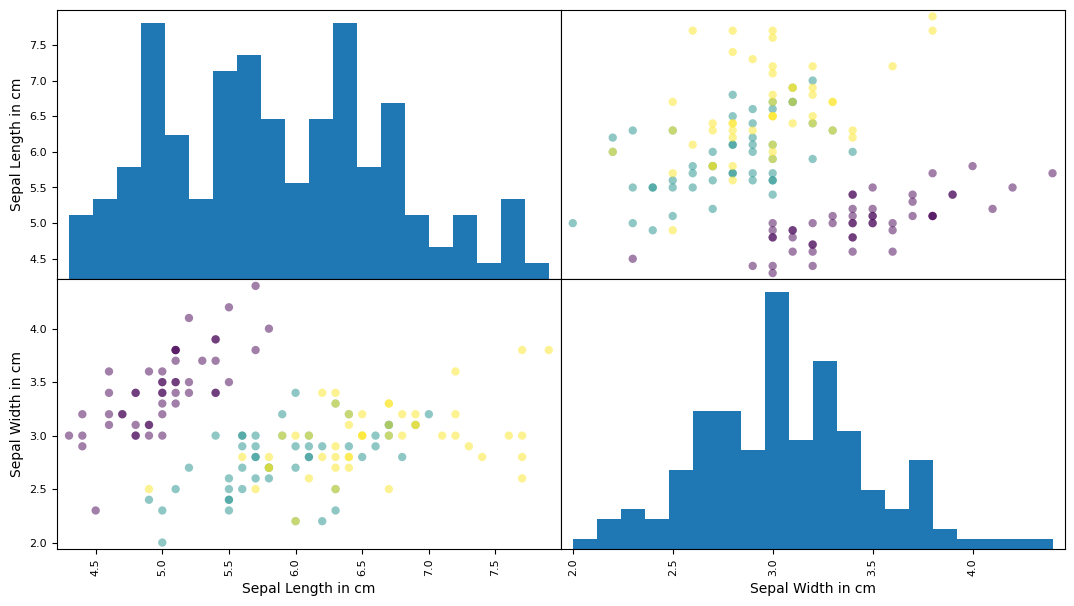

In [17]:
# Create a scatter plot matrix to visualize relationships between features in the Iris dataset
pd.plotting.scatter_matrix(iris_df.drop("Species", axis=1), c=y, figsize=(13, 7), marker='o', hist_kwds={'bins': 20})
plt.show()


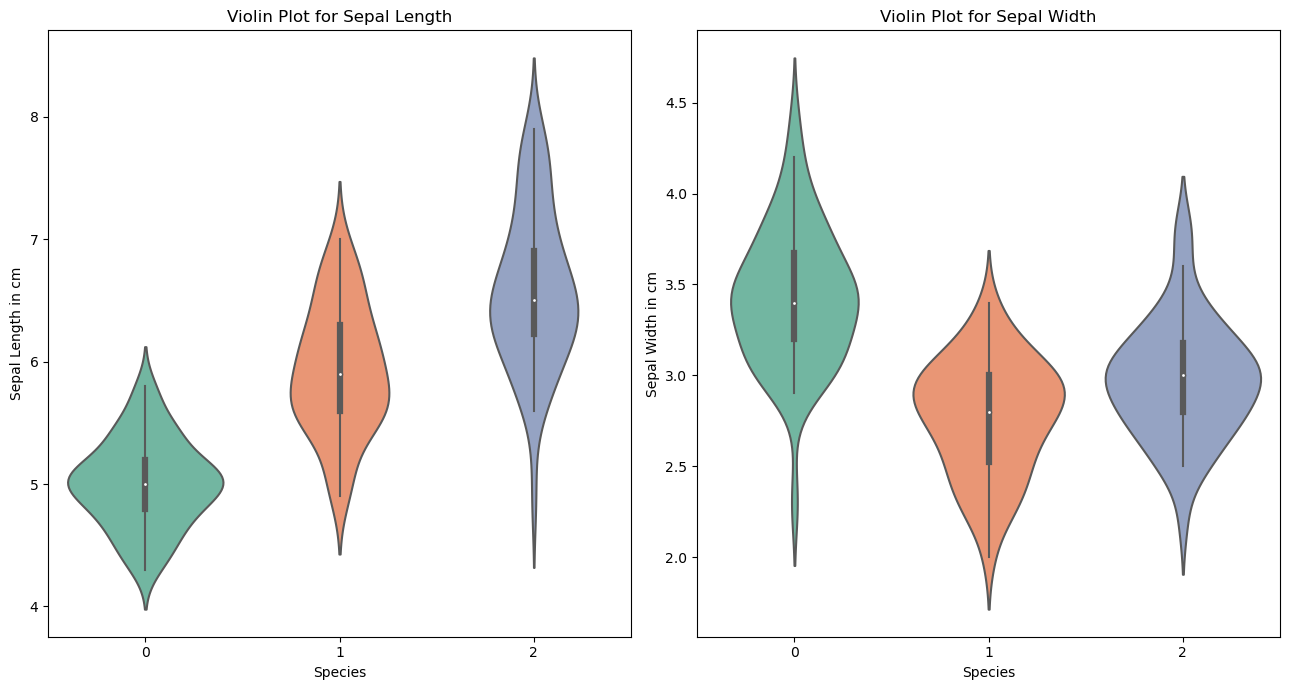

In [18]:
# Create violin plots for sepal length and sepal width
plt.figure(figsize=(13, 7))

# Violin plot for Sepal Length
plt.subplot(1, 2, 1)
sns.violinplot(x=y, y=X[:, 0], palette="Set2")
plt.xlabel("Species")
plt.ylabel("Sepal Length in cm")
plt.title("Violin Plot for Sepal Length")

# Violin plot for Sepal Width
plt.subplot(1, 2, 2)
sns.violinplot(x=y, y=X[:, 1], palette="Set2")
plt.xlabel("Species")
plt.ylabel("Sepal Width in cm")
plt.title("Violin Plot for Sepal Width")

plt.tight_layout()
plt.show()



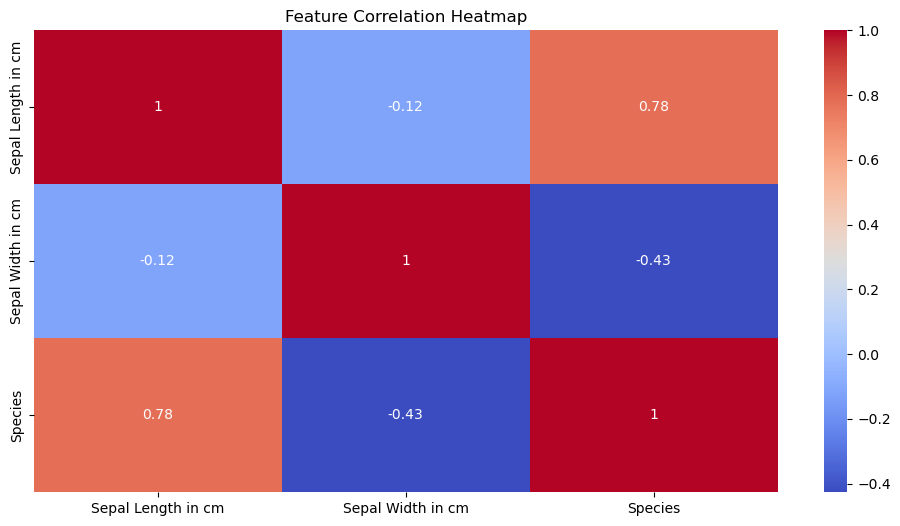

In [19]:
# Create a heatmap to visualize the correlation between features in the Iris dataset

plt.figure(figsize=(12, 6))
sns.heatmap(iris_df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()



In [20]:
# Split the dataset into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [21]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [22]:
# Train a KNN classifier
k = 3  # You can choose any suitable value for k
classifier = KNeighborsClassifier(n_neighbors=k)
classifier.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

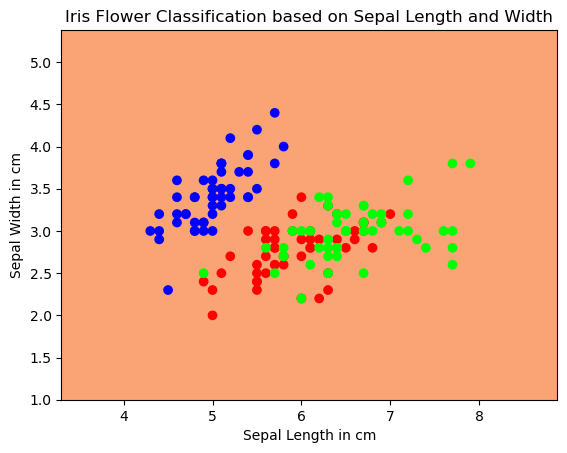

In [23]:
# Visualize the decision boundaries (for two features)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.brg)
plt.xlabel("Sepal Length in cm")
plt.ylabel("Sepal Width in cm")
plt.title("Iris Flower Classification based on Sepal Length and Width")
plt.show()

In [24]:
# Make predictions
y_pred = classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", confusion_mat)


Accuracy: 0.8444444444444444
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.80      0.62      0.70        13
           2       0.69      0.85      0.76        13

    accuracy                           0.84        45
   macro avg       0.83      0.82      0.82        45
weighted avg       0.85      0.84      0.84        45

Confusion Matrix:
 [[19  0  0]
 [ 0  8  5]
 [ 0  2 11]]
